In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wget
import re
Agressive = []
NonAgressive = []
MidAgressive=[]
label_names = ['Agressive', 'NonAgressive','MidAgressive']
num_epochs = 5
batch_size = 40

In [4]:
pip freeze

absl-py==0.7.1
asn1crypto==1.3.0
astor==0.8.0
astroid==2.2.5
attrs==19.1.0
autopep8==1.4.4
backcall==0.1.0
beautifulsoup4==4.8.0
bleach==3.1.0
boto==2.49.0
boto3==1.12.0
botocore==1.15.0
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.14.0
chardet==3.0.4
Click==7.0
colorama==0.4.1
cryptography==2.7
cx-Freeze==6.0
cycler==0.10.0
Cython==0.29.14
decorator==4.4.0
defusedxml==0.6.0
distro==1.4.0
docutils==0.15.2
entrypoints==0.3
enum34==1.1.6
filelock==3.0.12
Flask==1.1.1
future==0.18.2
gast==0.2.2
gensim==3.8.0
google-auth==1.7.0
google-auth-oauthlib==0.4.1
google-pasta==0.1.8
grpcio==1.16.1
gTTS==2.0.3
gTTS-token==1.1.3
h5py==2.8.0
idna==2.8
imageio==2.6.0
implicit==0.4.0
ipykernel==5.1.4
ipython==7.7.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
isort==4.3.20
itsdangerous==1.1.0
jedi==0.13.3
Jinja2==2.10.1
jmespath==0.9.4
joblib==0.13.2
jsonschema==3.0.1
jupyter-client==6.1.2
jupyter-core==4.6.3
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.0
Kivy==1.11.1
kivy-d

In [3]:
#downloading the pretrained word2vec model
import requests
url = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
myfile = requests.get(url)
open('./GoogleNews-vectors-negative300.bin.gz', 'wb').write(myfile.content)

In [2]:
def readDataFrame():
    #loading the dataset into the dataframe
    df=pd.read_csv("agr_en_train.csv")
    #changing the name of the columns
    df=df.rename(columns={"Well said sonu..you have courage to stand against dadagiri of Muslims": "Sentence", "OAG": "Label"})
    #deleting a row which is not essential for the model
    df.drop(columns="facebook_corpus_msr_1723796",inplace=True)
    return df

def cleanData():
    for i in range(len(df)):
        #replacing the categorical label to numeric label
        if df["Label"][i]=="NAG":
            df["Label"][i]=0
        if df["Label"][i]=="CAG":
            df["Label"][i]=1
        if df["Label"][i]=="OAG":
            df["Label"][i]=2 #converting the value of the label to two distinct type AGRESSIVE OR NON AGRESSIVE

    for i in range(len(df)):
        #using regex library to clean the dataset and convert each character to lowercase
        df["Sentence"][i]=re.sub('[^a-zA-Z]',' ', df["Sentence"][i])
        df["Sentence"][i]= df["Sentence"][i].lower()



In [3]:
#call the readDataFrame to intialize the data into the dataframe 
df=readDataFrame()
df.head()

,Sentence,Label
0,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
1,"Now question is, Pakistan will adhere to this?",OAG
2,Pakistan is comprised of fake muslims who does...,OAG
3,"??we r against cow slaughter,so of course it w...",NAG
4,Wondering why Educated Ambassador is strugglin...,CAG


In [4]:
#call the cleanData to process the data 
cleanData()
df.head()

,Sentence,Label
0,most of private banks atm s like hdfc icici e...,0
1,now question is pakistan will adhere to this,2
2,pakistan is comprised of fake muslims who does...,2
3,we r against cow slaughter so of course it w...,0
4,wondering why educated ambassador is strugglin...,1


In [5]:
# For tokenizing the sencences for data modelling
from nltk import word_tokenize
tokens = [word_tokenize(sentence) for sentence in df.Sentence]
def lowTocken(tokens): 
    return [w.lower() for w in tokens]    
lowTockens = [lowTocken(tokens) for tokens in tokens]

In [6]:
from nltk.corpus import stopwords
#storing the stopwords from the nltk library to remove them from the dataset
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lowTockens]
df['Sentence'] = [' '.join(sen) for sen in filtered_words]
#adding the token column into the dataframe 
df['tokens'] = filtered_words
df.head()

,Sentence,Label,tokens
0,private banks atm like hdfc icici etc cash pub...,0,"[private, banks, atm, like, hdfc, icici, etc, ..."
1,question pakistan adhere,2,"[question, pakistan, adhere]"
2,pakistan comprised fake muslims know meaning u...,2,"[pakistan, comprised, fake, muslims, know, mea..."
3,r cow slaughter course stop leather manufactur...,0,"[r, cow, slaughter, course, stop, leather, man..."
4,wondering educated ambassador struggling pay c...,1,"[wondering, educated, ambassador, struggling, ..."


In [7]:
#seperating the label into two distinct rows Agressive and nonAgressive
for m in df.Label:
    if m == 0:
        #adding 1 to nonAgressive if the label value is 0
        NonAgressive.append(1)
        #adding 0 to Agressive if the label value is 0
        Agressive.append(0)
        #adding 0 to MidAgressive if the label value is 0
        MidAgressive.append(0)
    elif m==1:
        #adding 0 to nonAgressive if the label value is 0
        NonAgressive.append(0)
        #adding 1 to MidAgressive if the label value is 1
        MidAgressive.append(1)
        #adding 0 to Agressive if the label value is 0
        Agressive.append(0)
    else:
       #adding 0 to nonAgressive if the label value is 0
        NonAgressive.append(0)
        #adding 1 to MidAgressive if the label value is 0
        MidAgressive.append(0)
        #adding 0 to Agressive if the label value is 1
        Agressive.append(1) 

# adding the two created columns to the dataset
df['NonAgressive']= NonAgressive
df['MidAgressive']=MidAgressive
df['Agressive']= Agressive

df = df[['Sentence', 'tokens', 'Label',  'NonAgressive','MidAgressive','Agressive']]
df.head()

,Sentence,tokens,Label,NonAgressive,MidAgressive,Agressive
0,private banks atm like hdfc icici etc cash pub...,"[private, banks, atm, like, hdfc, icici, etc, ...",0,1,0,0
1,question pakistan adhere,"[question, pakistan, adhere]",2,0,0,1
2,pakistan comprised fake muslims know meaning u...,"[pakistan, comprised, fake, muslims, know, mea...",2,0,0,1
3,r cow slaughter course stop leather manufactur...,"[r, cow, slaughter, course, stop, leather, man...",0,1,0,0
4,wondering educated ambassador struggling pay c...,"[wondering, educated, ambassador, struggling, ...",1,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
# importing train test split inorder to create training and testing data
data_train, data_test = train_test_split(df, 
                                         test_size=0.30, 
                                         random_state=30)
from gensim import models
#importing models from gensim library to load the word2vec model
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#creating the training words from the token column  of the dataframe
trainingWord = [word for tokens in data_train["tokens"] for word in tokens]
#converting the training word variable to a list of not repeating words and then sorting the list 
trainVoc = sorted(list(set(trainingWord)))
#creating the testing words from the token column of the dataframe 
testingWord = [word for tokens in data_test["tokens"] for word in tokens]
#converting the testing list into a list of non repeating elements and sorting then in order
testing_vocab = sorted(list(set(testingWord)))
#initializing the max length of the sentence to be fed into the dataset
MaxSeqLength = 40
#initializing the dimension of the neural network model
em_dim = 300
#tokenizing the training vocab 
tokenizer = Tokenizer(num_words=len(trainVoc), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Sentence"].tolist())
trainingSeq = tokenizer.texts_to_sequences(data_train["Sentence"].tolist())
train_word_index = tokenizer.word_index
train_cnn_data = pad_sequences(trainingSeq,maxlen=MaxSeqLength)

In [10]:
trainEmbeddingWeight = np.zeros((len(train_word_index)+1, em_dim))
for word,index in train_word_index.items():
    trainEmbeddingWeight[index,:] = word2vec[word] if word in word2vec else np.random.rand(em_dim)
test_sequences = tokenizer.texts_to_sequences(data_test["Sentence"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MaxSeqLength)

In [11]:
def createNetwork(embed, seqLen, count, emDim, IndLable):
    
    #initializing the embedding layer as the first layer
    Em_layer = Embedding(count,emDim,weights=[embed],input_length=seqLen,trainable=False)
    seq_Input = Input(shape=(seqLen,), dtype='int32')
    embedded_sequences = Em_layer(seq_Input)
    convo = []
    #loop to create multilayer of convo1D and max pooling layer
    filterSize = [1,3,5]
    for filter_size in filterSize:
        #creating convo1D layer with 300 filters and activation as relu
        lConv = tf.keras.layers.Conv1D(filters=300, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = tf.keras.layers.GlobalMaxPooling1D()(lConv)
        convo.append(l_pool)
    l_merge = concatenate(convo, axis=1)
    #creating dropout layer
    x = Dropout(0.1)(l_merge)  
    #creating dense layer
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = tf.keras.layers.Dense(IndLable, activation='softmax')(x)
    model = Model(seq_Input, preds)
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
    model.summary()
    return model

In [12]:
from __future__ import division, print_function
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
y_train = data_train[label_names].values

x_train = train_cnn_data
y_tr = y_train
model1 = createNetwork(trainEmbeddingWeight, MaxSeqLength, len(train_word_index)+1, em_dim, 
                len(list(label_names)))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 300)      5136900     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 40, 300)      90300       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 38, 300)      270300      embedding[0][0]                  
______________________________________________________________________________________________

In [13]:
def change_to_right(wrong_labels):
    right_labels=[]
    for x in wrong_labels:
        for i in range(0,len(wrong_labels[0])):
            if x[i]==1:
                right_labels.append(i)
    return right_labels
y_train = data_train[label_names].values
x_train = train_cnn_data
x_test=x_train[1:1001]
y_tr = tf.convert_to_tensor(np.array(change_to_right(y_train)))


In [14]:
y_test=[]
np.argmax(y_train[0])
for i in y_train[0:1000]:
    y_test.append(np.argmax(i))


In [23]:
#training the cnn model with the data provided
hist = model1.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.2, shuffle=True, batch_size=batch_size)
predictions = model1.predict(test_cnn_data, batch_size=1024, verbose=1)
labels = [0,1,2]
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])


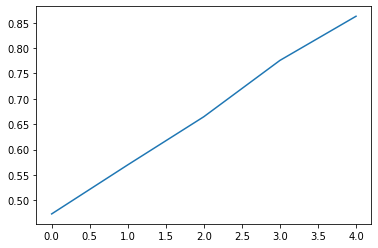

In [16]:
plt.plot(hist.history['acc'])

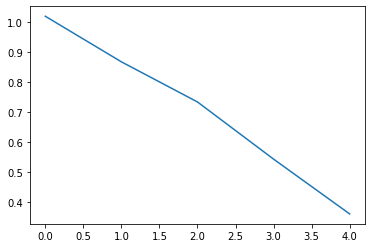

In [17]:
plt.plot(hist.history['loss'])

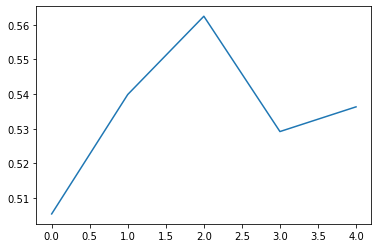

In [18]:
plt.plot(hist.history["val_acc"])

In [19]:
pred=model1.predict(x_test)
pred[0]

array([0.00414813, 0.9466439 , 0.04920808], dtype=float32)

In [22]:
predec=[]
for i in pred:
    predec.append(np.argmax(i))
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
#printing the confusion matrix and the accuracy score to ecaluate model
results = confusion_matrix(predec, y_test) 
print(results) 
accuracy_score(predec, y_test)

[[ 56  71  82]
 [ 88 172 138]
 [ 84 165 144]]


0.372

In [21]:
classification_report(predec, y_test) 

'              precision    recall  f1-score   support\n\n           0       0.25      0.27      0.26       209\n           1       0.42      0.43      0.43       398\n           2       0.40      0.37      0.38       393\n\n    accuracy                           0.37      1000\n   macro avg       0.35      0.36      0.35      1000\nweighted avg       0.37      0.37      0.37      1000\n'